# Visualização de Dados de Machine Learning
    
Este notebook demonstra a visualização inicial e a análise dos dados para um projeto de machine learning. O objetivo é entender melhor a estrutura dos dados, incluindo as características das amostras, a distribuição das classes e preparar o terreno para uma divisão eficiente em conjuntos de treino e teste.

## Importação das Bibliotecas

Começamos importando as bibliotecas necessárias para manipulação e visualização dos dados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import os

## Carregamento dos Dados

Carregamos os dados, que consistem em características (X) e rótulos (Y), a partir de arquivos `.npy`.

In [2]:
X = np.load('archive/X.npy')
Y = np.load('archive/Y.npy')

## Verificação das Dimensões dos Dados

É crucial entender as dimensões dos nossos conjuntos de dados para planejar as próximas etapas de análise e modelagem.

In [3]:
print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de Y: {Y.shape}')

print(f'Número de imagens: {X.shape[0]}')

Dimensões de X: (2062, 64, 64)
Dimensões de Y: (2062, 10)
Número de imagens: 2062


## Visualização de Amostras

Visualizamos algumas amostras das imagens para ter uma ideia da aparência dos dados e das classes que estamos tentando prever.

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Labels:  [0 0 0 ... 9 9 9]


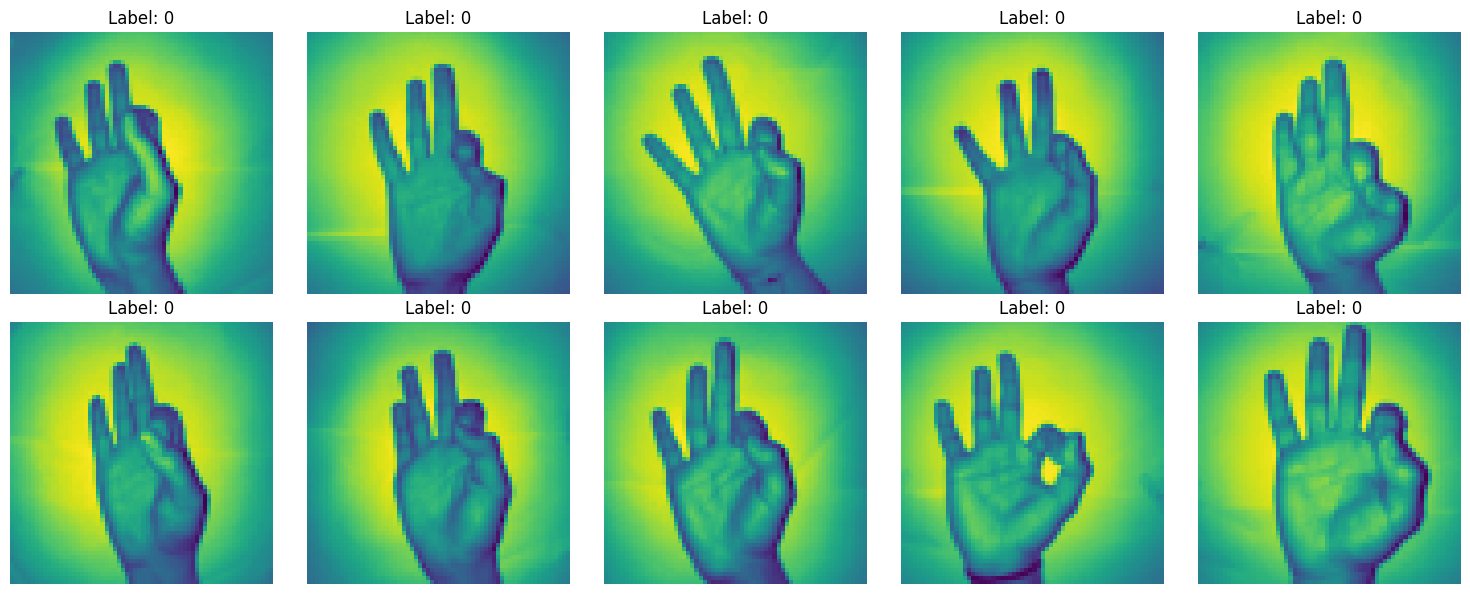

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

#print the labels
print(Y[:10])

print('Labels: ', np.argmax(Y[:2000], axis=1))

for i in range(10):
    ax = axs[i // 5, i % 5]
    ax.imshow(X[i])
    ax.title.set_text('Label: ' + str(np.argmax(Y[i])))
    ax.axis('off')
plt.tight_layout()
plt.show()

A partir da amostra dos dados, com especial enfase na distribuição das classes e das labels, verificámos que as o dataset não está organizado, i.e, as imagens não estão ordenadas pelo digito que representam mas sim aleatoriamente. Para resolver este problema, para melhorar a visualização e a análise dos dados, vamos organizar o dataset de forma a que as imagens estejam ordenadas pelo digito que representam.

## Organização dos Dados (NAO CORRER MAIS DO QUE UMA VEZ)


In [5]:
# Mapping classes to the correct digits
# class 0 = digit 9, class 1 = digit 0, class 2 = digit 7, class 3 = digit 6, class 4 = digit 1, class 5 = digit 8, class 6 = digit 4, class 7 = digit 3, class 8 = digit 2, class 9 = digit 5

class_to_digit = {0: 9, 1: 0, 2: 7, 3: 6, 4: 1, 5: 8, 6: 4, 7: 3, 8: 2, 9: 5}

# Convert Y from one-hot encoding to class indices
labels_indices = np.argmax(Y, axis=1)

# Correct the indices based on the mapping
correted_labels = np.array([class_to_digit[label] for label in labels_indices])

# Convert back to one-hot encoding
correted_Y = np.eye(10)[correted_labels]

print('Labels corrigidos: ', correted_labels[:2000])

# Sort the dataset by the digit each sample represents
sorted_indices = np.argsort(correted_labels)

print('Labels ordenados: ', correted_labels[sorted_indices])


# ordenar os labels
correted_Y = correted_Y[sorted_indices]
correted_X = X[sorted_indices]

# salvar os dados
np.save('archive/X.npy', X)
np.save('archive/Y.npy', correted_Y)


Labels corrigidos:  [9 9 9 ... 5 5 5]
Labels ordenados:  [0 0 0 ... 9 9 9]


## Divisão dos Dados

A divisão dos dados em conjuntos de treino e teste é uma etapa importante para preparar os dados para o treinamento de modelos de machine learning. A proporção comum é 80% para treino e 20% para teste, mas isso pode variar dependendo do tamanho do conjunto de dados e das necessidades específicas do projeto.

```python
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
```

Esse código divide os dados, mas as variáveis específicas `X` e `Y` precisam ser definidas com seus dados reais. Além disso, ajuste o `test_size` conforme necessário para o seu projeto.

---

Este notebook fornece uma visão geral inicial e a base para a exploração e modelagem mais detalhadas dos dados.

## Sample Distribution Analysis

To understand the balance between different classes in our dataset, it's useful to visualize the distribution of samples across classes. This helps in identifying if there's a class imbalance that might affect model training.

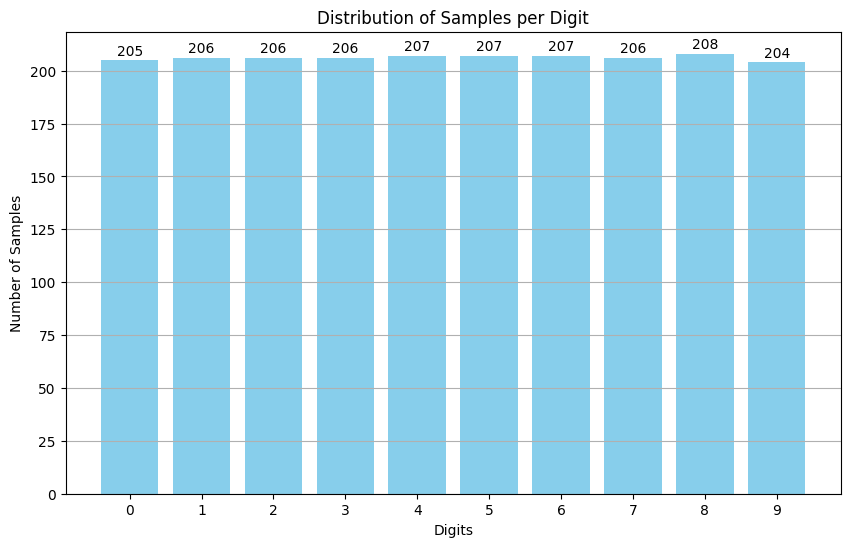

In [17]:
# Count the number of samples per digit
samples_per_digit = np.bincount(correted_labels[sorted_indices])

# Unique classes (assuming classes are sequential and start from 0)
unique_classes = np.arange(len(samples_per_digit))

#Print the number of samples per class
# print('Number of samples per class:')
# for i in range(len(samples_per_digit)):
#     print(f'Class {i}: {samples_per_digit[i]} samples')

# Create a histogram to visualize the distribution of samples per class
plt.figure(figsize=(10, 6))
plt.bar(unique_classes, samples_per_digit, color='skyblue')
for i in range(len(samples_per_digit)):
    plt.text(i, samples_per_digit[i] + 1, str(samples_per_digit[i]), ha='center', va='bottom')
plt.xlabel('Digits')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Digit')
plt.xticks(unique_classes)
plt.grid(axis='y')

plt.show()

## Mean Images Analysis

Understanding common patterns within each class can be crucial for interpreting how a machine learning model might be recognizing different categories. By calculating and visualizing the mean image for each class, we can get a sense of the most prominent features that characterize each class. This visualization helps in identifying whether the classes are visually distinguishable based on their mean patterns.

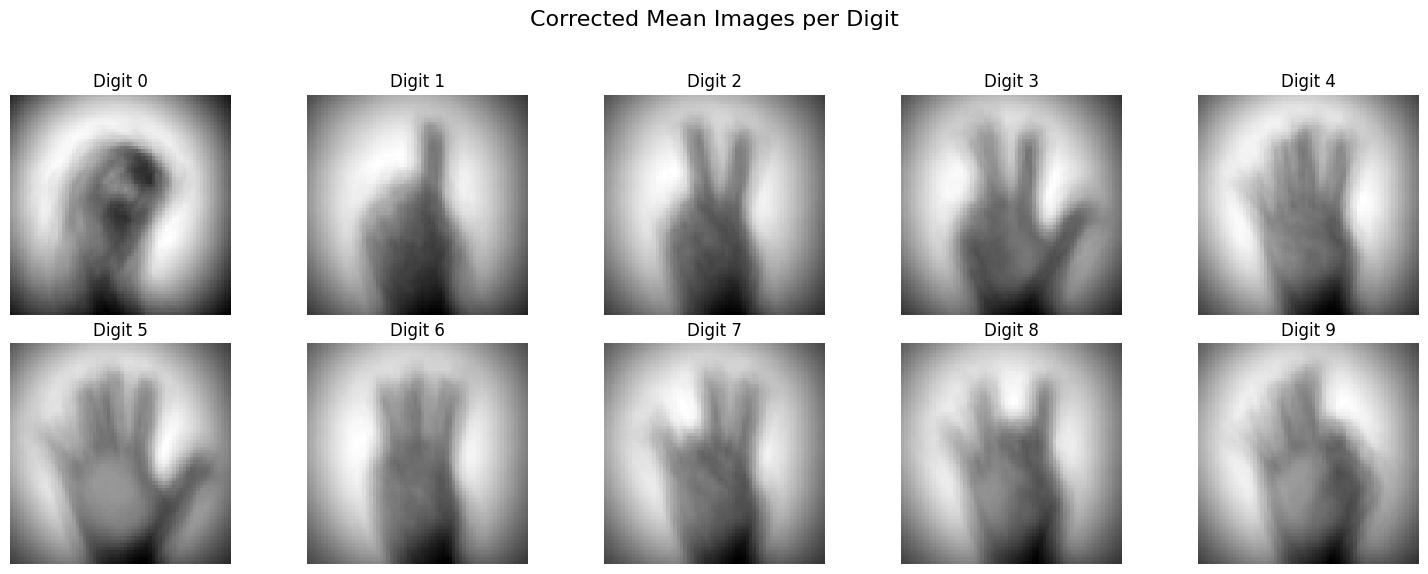

In [19]:
# Calcular a imagem média para cada dígito corrigido
mean_images_corrected = []
for digit in range(10):
    digit_images = correted_X[correted_labels[sorted_indices] == digit]
    mean_image = np.mean(digit_images, axis=0)
    mean_images_corrected.append(mean_image)

# Visualizar as imagens médias corrigidas para cada dígito
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Mean Images per Digit', fontsize=16)
for i, mean_image in enumerate(mean_images_corrected):
    ax = axs[i // 5, i % 5]
    ax.imshow(mean_image, cmap='gray')
    ax.title.set_text(f'Digit {i}')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [26]:
# Preparar os dados para o box plot
# Nota: Ajuste 'correted_X' para 'X_corrected_sorted' e 'correted_labels' para 'corrected_labels'
pixel_values_per_digit = [correted_X[correted_labels == digit].reshape(-1, 64*64).flatten() for digit in range(10)]

# Criar box plot
plt.figure(figsize=(12, 8))

# Nota: plt.boxplot espera uma sequência de dados, onde cada elemento da sequência é um array de valores a serem plotados.
# Aqui, cada array contém todos os valores de pixels achatados para um determinado dígito.
plt.boxplot(pixel_values_per_digit, labels=np.arange(10), showfliers=False)
plt.title('Distribution of Pixel Values by Digit')
plt.xlabel('Digit')
plt.ylabel('Pixel Intensity')
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.